In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(utils)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=7a5c65ad581c2d96d01e71bbd27abbb5&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbjIwV3czbGctcVVRZW0zOF9SR1I5WHhIbURVR0lvc29xT1pRZTltX0xXMDNmUWktSEk2Y1ZIdmxZZFNRR21BZyIsInN0YXRlIjoiN2E1YzY1YWQ1ODFjMmQ5NmQwMWU3MWJiZDI3YWJiYjUifQ==


In [4]:
# while(TRUE){}

In [5]:
# drive_deauth()
# drive_auth(use_oob = TRUE, cache = FALSE)

In [6]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

# GEDI vectorized by YOD, Queen's rule.
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link

In [7]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = FALSE)

File downloaded:

• HJA_LandTrendr_84_23_2.tif <id: 1FrN1tUojGV80f3kDtmezsFsvLabIoGiW>

Saved locally as:

• /content/HJA_LandTrendr_84_23.tif



In [8]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

File downloaded:

• HJA_GEDI_4.gpkg <id: 14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4>

Saved locally as:

• /content/HJA_gedi.gpkg



In [9]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

File downloaded:

• WBDHU8.gpkg <id: 1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z>

Saved locally as:

• /content/huc_8.gpkg

File downloaded:

• WBDHU10.gpkg <id: 1m86VWKw3nys-oY931eq9dC6xv0cEfs4a>

Saved locally as:

• /content/huc_10.gpkg

File downloaded:

• WBDHU12.gpkg <id: 18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL>

Saved locally as:

• /content/huc_12.gpkg



In [10]:
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link
drive_download(file = as_id('1miOMqCh081yceVUfVVOL5JtxpKUgBO-2'), path =  '/content/gedi_vector.gpkg', overwrite = TRUE)

File downloaded:

• yod_vector.gpkg <id: 1miOMqCh081yceVUfVVOL5JtxpKUgBO-2>

Saved locally as:

• /content/gedi_vector.gpkg



In [11]:
# https://drive.google.com/file/d/1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa/view?usp=drive_link
drive_download(file = as_id('1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa'), path =  '/content/conus_2003.tif', overwrite = TRUE)

File downloaded:

• conus_forest_biomass_mg_per_ha.img <id: 1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa>

Saved locally as:

• /content/conus_2003.tif



In [12]:
# https://drive.google.com/file/d/1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh/view?usp=drive_link

drive_download(file = as_id('1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh'), path =  '/content/conus_2016.tif', overwrite = TRUE)

File downloaded:

• biomass_k10_2016.tif <id: 1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh>

Saved locally as:

• /content/conus_2016.tif



In [13]:
# https://drive.google.com/file/d/1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4/view?usp=drive_link

drive_download(file = as_id('1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4'), path =  '/content/hja_2008.tif', overwrite = TRUE)

File downloaded:

• AGLB_2008.tif <id: 1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4>

Saved locally as:

• /content/hja_2008.tif



In [14]:
# https://drive.google.com/file/d/1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI/view?usp=drive_link
drive_download(file = as_id('1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI'), path =  '/content/wnf_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS/view?usp=drive_link
drive_download(file = as_id('1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS'), path =  '/content/fire_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms/view?usp=drive_link
drive_download(file = as_id('1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms'), path =  '/content/harvest_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1XluoE3kGZ1u5-az0EmimhRpe__qzApM4/view?usp=drive_link
drive_download(file = as_id('1XluoE3kGZ1u5-az0EmimhRpe__qzApM4'), path =  '/content/aoi_boundary.geojson', overwrite = TRUE)

File downloaded:

• clip_wnfveg6.gpkg <id: 1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI>

Saved locally as:

• /content/wnf_history.gpkg

File downloaded:

• Fire_History_HJA.gpkg <id: 1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS>

Saved locally as:

• /content/fire_history.gpkg

File downloaded:

• HJA_Harvest_Sites.gpkg <id: 1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms>

Saved locally as:

• /content/harvest_history.gpkg

File downloaded:

• hja_boundary.geojson <id: 1XluoE3kGZ1u5-az0EmimhRpe__qzApM4>

Saved locally as:

• /content/aoi_boundary.geojson



In [15]:
# https://drive.google.com/file/d/16h1dV9JEpYwts4grE959eTfqCc5yP05I/view?usp=drive_link
drive_download(file = as_id('16h1dV9JEpYwts4grE959eTfqCc5yP05I'), path =  '/content/Huc_Intersection_Set_2.zip', overwrite = TRUE)

File downloaded:

• HUC_Intersection_Set_2.zip <id: 16h1dV9JEpYwts4grE959eTfqCc5yP05I>

Saved locally as:

• /content/Huc_Intersection_Set_2.zip



In [16]:
# Set the file path to the downloaded zip file and the destination where it should be extracted
zip_file_path <- '/content/Huc_Intersection_Set_2.zip'
extraction_path <- '/content/Huc_Intersection_Set_2'

# Unzip the file
unzip(zip_file_path, exdir = extraction_path)

In [17]:
while(TRUE){}

In [18]:
huc_8_gpgk <- st_read('/content/huc_8.gpkg') %>% st_transform(st_crs('EPSG:4326'))
huc_10_gpgk <- st_read('/content/huc_10.gpkg')  %>% st_transform(st_crs('EPSG:4326'))
huc_12_gpgk <- st_read('/content/huc_12.gpkg')  %>% st_transform(st_crs('EPSG:4326'))

Reading layer `wbdhu8_central_oregon__wdb_oregon_state_gdb__wbdhu8' from data source `/content/huc_8.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu10' from data source 
  `/content/huc_10.gpkg' using driver `GPKG'
Simple feature collection with 27 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu12' from data source 
  `/content/huc_12.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83


In [19]:
hja_2008_tif <- stack('/content/hja_2008.tif')
conus_2003_tif <- stack('/content/conus_2003.tif')
conus_2016_tif  <- stack('/content/conus_2016.tif')

In [20]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [21]:
# huc_8_gpgk$HUC8

In [22]:
gedi_int_dt <-
"/content/Huc_Intersection_Set_2/content/HUC_Intersection_Set_2" %>%
  list.files(full.names = T) %>%
  lapply(function(x){
  x_sf <- st_read(x)
  # x_sf$HUC_8 <- huc_8_gpgk$HUC_8[x_sf %>% st_intersects(huc_8_gpgk)  %>% lapply(function(z){z[1]}) %>% unlist]
  # x_sf$HUC_10 <- huc_10_gpgk$HUC_10[x_sf %>% st_intersects(huc_10_gpgk)  %>% lapply(function(z){z[1]}) %>% unlist]
  # x_sf$HUC_12 <- huc_12_gpgk$HUC_12[x_sf %>% st_intersects(huc_12_gpgk)  %>% lapply(function(z){z[1]}) %>% unlist]
  return(x_sf)
  }) %>%
  lapply(data.table) %>%
  rbindlist()

Reading layer `huc_10_1' from data source 
  `/content/Huc_Intersection_Set_2/content/HUC_Intersection_Set_2/huc_10_1.gpkg' 
  using driver `GPKG'
Simple feature collection with 94451 features and 60 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.1598 ymin: 44.70176 xmax: -121.7601 ymax: 44.84941
Geodetic CRS:  WGS 84
Reading layer `huc_10_10' from data source 
  `/content/Huc_Intersection_Set_2/content/HUC_Intersection_Set_2/huc_10_10.gpkg' 
  using driver `GPKG'
Simple feature collection with 73478 features and 60 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.6751 ymin: 44.31805 xmax: -122.4225 ymax: 44.48284
Geodetic CRS:  WGS 84
Reading layer `huc_10_11' from data source 
  `/content/Huc_Intersection_Set_2/content/HUC_Intersection_Set_2/huc_10_11.gpkg' 
  using driver `GPKG'
Simple feature collection with 85232 features and 60 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.6787 ymin: 44.26722 xmax: -122.415

In [23]:
huc_12_gpgk %>% head

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

OBJECTID TNMID                                 
1 2776     {C5422594-83A3-4387-934D-8A0A8D5CC177}
2 2777     {D913B159-09A3-4CC9-910B-A34FF9BAD6DA}
3 2778     {332D3955-AAB6-40A1-81DE-0BEDDD37BC7B}
4 2779     {1FDE3F77-F2D9-43F0-BC18-6636D10019B6}
5 2780     {A45E413B-6867-41A6-9CF9-CEE67A190274}
6 2781     {7EECAB49-4203-42E2-B952-2E0C244C208F}
  MetaSourceID                           SourceDataDesc SourceOriginator
1 NA                                     NA             NA              
2 NA                                     NA             NA              
3 NA                                     NA             NA              
4 NA                                     NA             NA              
5 {A4B99D2F-D7C5-4BCA-A07F-0B6FDF219B65} NA             NA              
6 {A4B99D2F-D7C5-4BCA-A07F-0B6FDF219B65} NA             NA              
  SourceFeatureID LoadDate            GNIS_ID AreaAcres AreaSqKm
1 NA              2013-01-18 07:09:30 NA      13082.07  52.94   
2 NA              2013-01-18 07:09:30 NA      16254.91  65.78   
3 NA              2013-01-18 07:09:30 NA      20395.17  82.54   
4 NA              2013-01-18 07:09:30 NA       9202.70  37.24   
5 NA              2016-12-01 09:32:19 NA      18204.50  73.67   
6 NA              2016-12-01 09:32:19 NA      17233.08  69.74   
  geom                           ⋯ HUC12       
1 MULTIPOLYGON (((-121.8047 4... ⋯ 170900050101
2 MULTIPOLYGON (((-121.8202 4... ⋯ 170900050102
3 MULTIPOLYGON (((-121.9297 4... ⋯ 170900050104
4 MULTIPOLYGON (((-122.0755 4... ⋯ 170900050105
5 MULTIPOLYGON (((-121.9255 4... ⋯ 170900050201
6 MULTIPOLYGON (((-122.0499 4... ⋯ 170900050202
  Name                               HUType HUMod ToHUC       
1 South Fork Breitenbush River       S      NM    170900050104
2 North Fork Breitenbush River       S      NM    170900050104
3 Upper Breitenbush River            S      NM    170900050105
4 Lower Breitenbush River            S      NM    170900050303
5 Swede Creek-North Santiam River    S      NM    170900050202
6 Straight Creek-North Santiam River S      NM    170900050205
  NonContributingAreaAcres NonContributingAreaSqKm Shape_Length Shape_Area 
1 0                        0                       0.4489297    0.006015605
2 0                        0                       0.5418556    0.007478749
3 0                        0                       0.5543546    0.009382288
4 0                        0                       0.3504292    0.004232901
5 0                        0                       0.5759817    0.008335991
6 0                        0                       0.4421352    0.007898973
  geom                          
1 MULTIPOLYGON (((-121.8047 4...
2 MULTIPOLYGON (((-121.8202 4...
3 MULTIPOLYGON (((-121.9297 4...
4 MULTIPOLYGON (((-122.0755 4...
5 MULTIPOLYGON (((-121.9255 4...
6 MULTIPOLYGON (((-122.0499 4...

In [24]:
  # x_sf <- gedi_int_dt %>% st_as_sf
  gedi_int_dt$HUC8 <- huc_8_gpgk$HUC8[gedi_int_dt$geom %>% st_intersects(huc_8_gpgk)  %>% lapply(function(x){x[1]}) %>% unlist]
  gedi_int_dt$HUC10 <- huc_10_gpgk$HUC10[gedi_int_dt$geom %>% st_intersects(huc_10_gpgk)  %>% lapply(function(x){x[1]}) %>% unlist]
  gedi_int_dt$HUC12 <- huc_12_gpgk$HUC12[gedi_int_dt$geom %>% st_intersects(huc_12_gpgk)  %>% lapply(function(x){x[1]}) %>% unlist]

In [25]:
# gedi_int_dt$HUC12  %>% table

In [26]:
gedi_int_dt %>% nrow
gedi_int_dt[l4_quality_flag ==1,] %>% nrow

gedi_int_dt %>% names

[1] 5447648

[1] 1796045

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "gedi_year"          "min_yod"            "min_mag"           
[19] "min_dur"            "min_preval"         "min_rate"          
[22] "min_dsnr"           "max_yod"            "max_mag"           
[25] "max_dur"            "max_preval"         "max_rate"          
[28] "max_dsnr"           "mean_yod"           "mean_mag"          
[31] "mean_dur"           "mean_preval"        "mean_rate"         
[34] "mean_dsnr"          "median_yod"         "median_mag"        
[37] "median_dur"         "median_preval"      "median_rate"       
[40] "median_dsnr"        "min_hja_2008"       "max_hja_2008"      
[43] "mean_hja_2008"      "median_hja_2008"    "min_conus_2003"    
[46] "max_conus_2003"     "mean_conus_2003"    "median_conus_2003" 
[49] "min_conus_2016"     "max_conus_2016"     "mean_conus_2016"   
[52] "median_conus_2016"  "gedi_vec_id"        "gedi_vec_year"     
[55] "gedi_vec_area"      "Ownership"          "LandManager"       
[58] "FIRE_INC_ID"        "FIRE_NAME"          "FIRE_YEAR"         
[61] "geom"               "HUC8"               "HUC10"             
[64] "HUC12"

In [27]:
gedi_int_dt$Ownership %>% table
gedi_int_dt$LandManager %>% table

.
    BIA     BLM     BPA     DOD     DOE     FWS     GSA      LG     ODF ODFODSL 
   1140  286014     325    1010      88    8759     659   13428   60692    1277 
   ODFW    ODOT    ODSL    OPRD      OR     OSU      PV     PVI  TRIBAL   USACE 
   4473     477     315    6337     807   24871 2063725 1095308    2335   45358 
   USDA    USFS   WATER 
     48 1826915    3287 

.
    PNI     PVI 
  72979 1320867 

In [36]:
gedi_int_dt %>% names

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "gedi_year"          "min_yod"            "min_mag"           
[19] "min_dur"            "min_preval"         "min_rate"          
[22] "min_dsnr"           "max_yod"            "max_mag"           
[25] "max_dur"            "max_preval"         "max_rate"          
[28] "max_dsnr"           "mean_yod"           "mean_mag"          
[31] "mean_dur"           "mean_preval"        "mean_rate"         
[34] "mean_dsnr"          "median_yod"         "median_mag"        
[37] "median_dur"         "median_preval"      "median_rate"       
[40] "median_dsnr"        "min_hja_2008"       "max_hja_2008"      
[43] "mean_hja_2008"      "median_hja_2008"    "min_conus_2003"    
[46] "max_conus_2003"     "mean_conus_2003"    "median_conus_2003" 
[49] "min_conus_2016"     "max_conus_2016"     "mean_conus_2016"   
[52] "median_conus_2016"  "gedi_vec_id"        "gedi_vec_year"     
[55] "gedi_vec_area"      "Ownership"          "LandManager"       
[58] "FIRE_INC_ID"        "FIRE_NAME"          "FIRE_YEAR"         
[61] "geom"               "HUC8"               "HUC10"             
[64] "HUC12"              "shot_id"

In [49]:
gedi_int_dt[,group_quantile:=as.integer(cut((mean_preval-mean_mag), breaks = quantile(((mean_preval-mean_mag))[!is.na(agbd) & median_preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE))  %>%as.factor(),by=.(HUC8)]

In [61]:
gedi_int_dt[,biomass_init:=mean(agbd[!is.na(agbd) & median_preval > 0 & gedi_year>min_yod-5],na.rm=T),by=.(HUC8,group_quantile)]

In [93]:
gedi_int_dt %>% names

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "gedi_year"          "min_yod"            "min_mag"           
[19] "min_dur"            "min_preval"         "min_rate"          
[22] "min_dsnr"           "max_yod"            "max_mag"           
[25] "max_dur"            "max_preval"         "max_rate"          
[28] "max_dsnr"           "mean_yod"           "mean_mag"          
[31] "mean_dur"           "mean_preval"        "mean_rate"         
[34] "mean_dsnr"          "median_yod"         "median_mag"        
[37] "median_dur"         "median_preval"      "median_rate"       
[40] "median_dsnr"        "min_hja_2008"       "max_hja_2008"      
[43] "mean_hja_2008"      "median_hja_2008"    "min_conus_2003"    
[46] "max_conus_2003"     "mean_conus_2003"    "median_conus_2003" 
[49] "min_conus_2016"     "max_conus_2016"     "mean_conus_2016"   
[52] "median_conus_2016"  "gedi_vec_id"        "gedi_vec_year"     
[55] "gedi_vec_area"      "Ownership"          "LandManager"       
[58] "FIRE_INC_ID"        "FIRE_NAME"          "FIRE_YEAR"         
[61] "geom"               "HUC8"               "HUC10"             
[64] "HUC12"              "shot_id"            "group_quantile"    
[67] "biomass_init"

In [238]:
pre_post_dt <- gedi_int_dt[mean_yod>1983,list(
  biomass_pre = mean(agbd[!is.na(agbd) & median_preval > 0 & gedi_year < min_yod &l4_quality_flag==1],na.rm=T),
  biomass_post = mean(agbd[!is.na(agbd) & median_preval > 0 & gedi_year > max_yod &l4_quality_flag==1],na.rm=T),
  mean_preval = mean(mean_preval[!is.na(agbd) & median_preval > 0 & gedi_year > max_yod &l4_quality_flag==1],na.rm=T),
  mean_mag = mean(mean_mag[!is.na(agbd) & median_preval > 0 & gedi_year > max_yod &l4_quality_flag==1],na.rm=T),
  gedi_year_pre = mean(gedi_year[!is.na(agbd) & median_preval > 0 & gedi_year < min_yod &l4_quality_flag==1] %>% as.numeric,na.rm=T),
  gedi_year_post = mean(gedi_year[!is.na(agbd) & median_preval > 0 & gedi_year > max_yod &l4_quality_flag==1] %>% as.numeric,na.rm=T),
  mean_yod = mean(mean_yod[!is.na(agbd) & median_preval > 0 & gedi_year > max_yod &l4_quality_flag==1],na.rm=T),
  n_pre=length(agbd[!is.na(agbd) & median_preval > 0 & gedi_year < min_yod &l4_quality_flag==1]),
  n_post=length(agbd[!is.na(agbd) & median_preval > 0 & gedi_year > max_yod &l4_quality_flag==1])
  ),by=.(HUC8,gedi_vec_id)][!is.na(biomass_pre) &!is.na(biomass_post)]

In [217]:
pre_post_dt <- pre_post_dt[n_pre > 10 & n_post> 10]

In [239]:
pre_post_dt[,group_quantile:=as.integer(cut((mean_preval-mean_mag)/mean_preval, breaks = quantile(((mean_preval-mean_mag)/mean_preval), probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE))  %>%as.factor(),by=.()]

In [220]:
pre_post_dt

HUC8,gedi_vec_id,biomass_pre,biomass_post,mean_preval,mean_mag,gedi_year_pre,gedi_year_post,mean_yod,n_pre,n_post,group_quantile
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
17090005,150075,317.2409,140.22870,839.4253,506.0675,2019.506,2022.000,2020.822,23067,13607,1
17090005,82432,247.3816,132.19351,828.3922,409.7367,2019.493,2022.000,2020.630,73,43,2
17090005,62990,423.5232,329.87371,863.0504,400.0714,2019.427,2022.000,2020.028,96,35,3
17090006,293426,350.8394,94.52339,860.6260,412.9524,2019.880,2022.000,2020.740,25,17,2
17090006,274892,181.4478,45.97725,895.7503,469.9654,2019.857,2022.000,2021.000,28,11,1
17090006,296172,173.2347,74.59752,894.1319,375.4252,2019.000,2021.583,2019.990,13,12,3
17090006,184660,393.8597,47.85769,873.9696,460.6426,2019.000,2021.062,2019.974,15,16,1
17090006,167823,232.2902,34.14143,869.3548,429.0919,2019.000,2021.364,2019.712,14,11,2
17090006,166995,247.0439,43.03721,880.6728,453.6803,2019.000,2021.238,2020.000,17,21,2


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


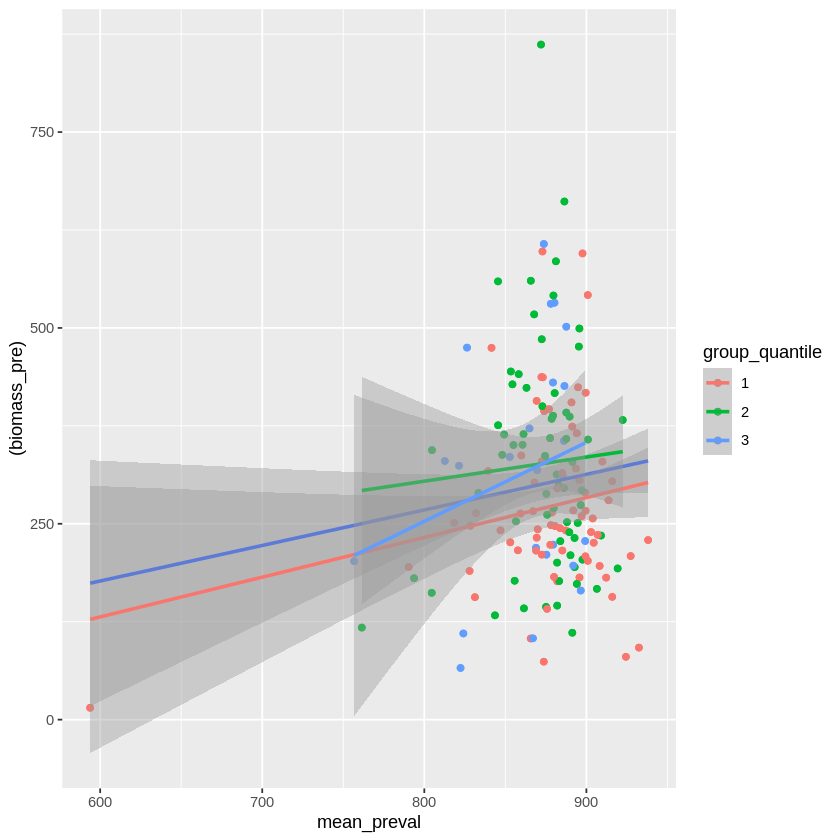

In [268]:
pre_post_dt[n_pre > 4 & n_post> 4 &gedi_year_pre<mean_yod &gedi_year_post > mean_yod ] %>%
  ggplot(aes(y=(biomass_pre),x=mean_preval))+
  geom_point(aes(color = group_quantile))+
  geom_point(aes(color = group_quantile))+
  geom_smooth(method='lm')+
  geom_smooth(aes(color = group_quantile),method='lm')



In [299]:
gedi_int_dt

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,FIRE_INC_ID,FIRE_NAME,FIRE_YEAR,geom,HUC8,HUC10,HUC12,shot_id,group_quantile,biomass_init
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<POINT [°]>,<chr>,<chr>,<chr>,<int>,<fct>,<dbl>
NA,44.81151,-122.1321,-9999,-9999,-9999,-9999,-9999,0,1,⋯,NA,NA,NA,POINT (-122.1321 44.81151),17090005,1709000501,170900050103,1,2,22.11820
NA,44.80826,-122.0978,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.0978 44.80826),17090005,1709000501,170900050103,2,1,17.29384
NA,44.80799,-122.0972,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.0972 44.80799),17090005,1709000501,170900050103,3,1,17.29384
NA,44.80773,-122.0966,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.0966 44.80773),17090005,1709000501,170900050103,4,1,17.29384
NA,44.80747,-122.0960,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.096 44.80747),17090005,1709000501,170900050103,5,1,17.29384
NA,44.80721,-122.0953,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.0953 44.80721),17090005,1709000501,170900050103,6,1,17.29384
NA,44.80695,-122.0947,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.0947 44.80695),17090005,1709000501,170900050103,7,1,17.29384
NA,44.80669,-122.0941,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.0941 44.80669),17090005,1709000501,170900050103,8,1,17.29384
NA,44.80643,-122.0935,-9999,-9999,-9999,-9999,-9999,0,0,⋯,NA,NA,NA,POINT (-122.0935 44.80643),17090005,1709000501,170900050103,9,1,17.29384


In [499]:
summary_dt <- gedi_int_dt[is.na(FIRE_NAME) & min_yod < gedi_year & max_yod < gedi_year%>% as.numeric &mean_yod>1983 &!is.na(agbd) & median_preval > 0 &l4_quality_flag==1,list(
  agbd = mean(agbd,na.rm=T),
  agbd_sd = sd(agbd,na.rm=T),
  agbd_cvr = sd(agbd,na.rm=T)/mean(agbd,na.rm=T),
  mean_preval = mean(mean_preval,na.rm=T),
  mean_mag = mean(mean_mag,na.rm=T),
  # gedi_year_pre = mean(gedi_year %>% as.numeric,na.rm=T),
  mean_yod = mean(mean_yod,na.rm=T),
  n=length(agbd)
  ),by=.(HUC8,gedi_year,gedi_vec_id)]

In [500]:
summary_dt[,group_quantile:=as.integer(cut((mean_preval-mean_mag)/mean_preval, breaks = quantile(((mean_preval[n>5]-mean_mag[n>5])/mean_preval[n>5]), probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE))  %>%as.factor(),by=.()]


In [501]:
summary_dt$group_quantile %>% is.na %>% table

.
FALSE  TRUE 
55002   327 

In [482]:
# summary_dt<- summary_dt[n>5,
#   list(
#   agbd = mean(agbd,na.rm=T),
#   agbd_sd = sd(agbd,na.rm=T),
#   agbd_cvr = sd(agbd,na.rm=T)/mean(agbd,na.rm=T),
#   mean_preval = mean(mean_preval,na.rm=T),
#   mean_mag = mean(mean_mag,na.rm=T),
#   # gedi_year_pre = mean(gedi_year %>% as.numeric,na.rm=T),
#   mean_yod = mean(mean_yod,na.rm=T),
#   n=sum(n)
#   ),by=.(HUC8,group_quantile,gedi_year,round(mean_yod))][]

In [436]:
# while(TRUE){}

In [502]:
summary_dt[!is.na(agbd_cvr) & agbd_cvr < 1 & n>5,][mean_yod ==2020]

HUC8,gedi_year,gedi_vec_id,agbd,agbd_sd,agbd_cvr,mean_preval,mean_mag,mean_yod,n,group_quantile
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
17090006,2021,174083,97.51620,43.968128,0.4508802,829.5616,424.7496,2020,11,2
17090006,2021,177105,39.45523,21.148581,0.5360147,887.9034,360.2891,2020,7,3
17090004,2022,398516,17.04668,1.802924,0.1057640,860.5183,452.1512,2020,9,1
17090003,2022,197242,40.76487,18.373687,0.4507236,893.7209,373.1579,2020,6,3
17090003,2021,305023,108.88740,45.642841,0.4191747,905.5924,475.5574,2020,11,1
17090005,2021,140894,69.15240,34.136708,0.4936446,893.8809,462.3743,2020,8,2
17090006,2021,272877,65.39997,37.801346,0.5780025,902.0170,474.2816,2020,6,1
17090006,2021,226702,25.58555,10.004706,0.3910296,887.2298,392.7886,2020,20,3


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


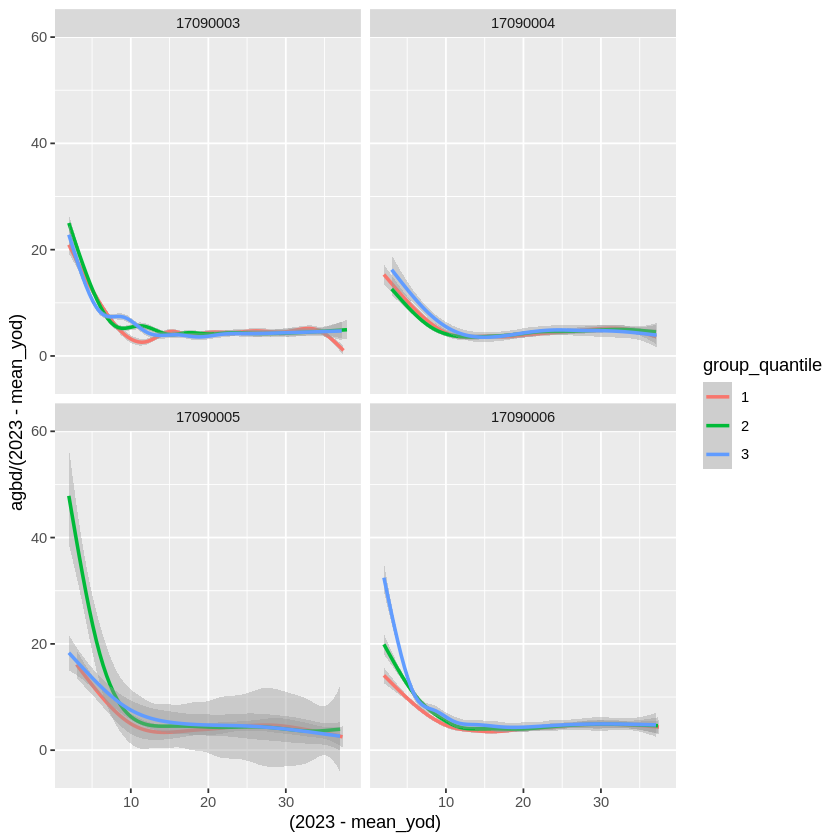

In [503]:
summary_dt[n>5,] %>%
  ggplot(aes(x=(2023-mean_yod),y=agbd/(2023-mean_yod),weight=n))+
    # geom_point(aes(color=group_quantile))+
    geom_smooth(aes(color=group_quantile)) +
    facet_wrap(~HUC8)

In [282]:
summary_dt[gedi_vec_id == '142615']

HUC8,HUC10,HUC12,gedi_year,gedi_vec_id,agbd,mean_preval,mean_mag,gedi_year_pre,mean_yod,n
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
17090005,1709000501,170900050101,2019,142615,109.39169,761.8733,487.8310,2019,2018.006,73
17090005,1709000501,170900050101,2020,142615,86.54429,760.1330,475.8446,2020,2018.012,38
17090005,1709000501,170900050101,2022,142615,75.19495,758.9464,482.5294,2022,2017.724,93
17090005,1709000501,170900050101,2021,142615,96.01946,771.4088,479.7210,2021,2018.026,65
17090005,1709000502,170900050206,2019,142615,87.91749,784.1903,516.0391,2019,2018.001,223
17090005,1709000502,170900050204,2019,142615,90.34049,785.8902,365.9285,2019,2017.721,37
17090005,1709000502,170900050206,2022,142615,67.91666,808.3347,525.1459,2022,2018.039,231
17090005,1709000502,170900050204,2022,142615,47.35596,789.1913,374.9901,2022,2017.824,42
17090005,1709000502,170900050206,2020,142615,81.76872,806.6461,522.9308,2020,2018.017,219


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 63422 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Computation failed in `stat_smooth()`
Caused by error in `smooth.construct.cr.smooth.spec()`:
! x has insufficient unique values to support 10 knots: reduce k.”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 63422 rows containing non-finite values (`stat_smooth()`).”


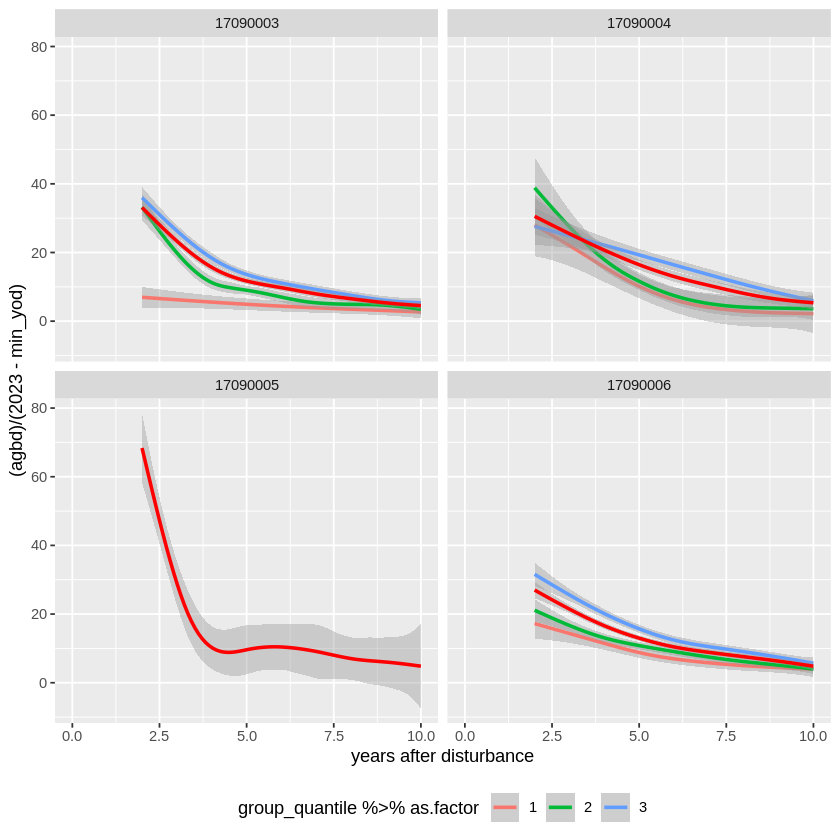

In [509]:
gedi_int_dt[!(gedi_int_dt$HUC8 %>% is.na) & is.na(FIRE_NAME) & !(gedi_int_dt$HUC10 %>% is.na) &min_yod>1980 & gedi_year>min_yod  & gedi_year>max_yod   & !is.na(agbd) &l4_quality_flag==1,][,list(agbd = mean(agbd,na.rm=T),mean_conus_2003 = mean(mean_conus_2003,na.rm=T),mean_hja_2008 = mean(mean_hja_2008,na.rm=T),mean_conus_2016 = mean(mean_conus_2016,na.rm=T),min_yod = mean(min_yod,na.rm=T),biomass_init= mean(biomass_init,na.rm=T)),by=.(gedi_year,gedi_vec_id,group_quantile,HUC8,HUC10,HUC12)] %>%
  ggplot(aes(x=2023-min_yod,y=(agbd)/(2023-min_yod)))+
  # geom_point( ) +
  # geom_point(aes(y=mean_conus_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # geom_point(aes(y=mean_hja_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  ) +
  # geom_point(aes(y=mean_conus_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  )+
  # geom_abline(color='red') +
  geom_smooth(aes(color=group_quantile %>% as.factor,group = group_quantile) ) +
  # geom_boxplot(aes(color=HUC8 %>% as.factor,group = 2023-min_yod) ) +
  geom_smooth(aes(group = HUC8),color='red') +
  # geom_smooth(aes(y=mean_conus_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # geom_smooth(aes(y=mean_hja_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # geom_smooth(aes(y=mean_conus_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # Hide the annotations
  # Manually add custom legend
  xlim(0,10)+
  xlab('years after disturbance')+
  # scale_color_manual(
  #   values = c('GEDI' = 'green', 'MODIS 2003' = 'red', 'ALS, 2008' = 'purple', 'LS, 2016' = 'salmon'),
  #   name = 'agbd source',  # Changing the name of the legend here  #   breaks = c('GEDI','MODIS 2003','ALS, 2008','LS, 2016'),
  #   labels = c('GEDI', 'MODIS 2003', 'ALS, 2008','LS, 2016'),
  #   position = 'bottom') +
  theme(legend.position = 'bottom')+
  facet_wrap(HUC8~.)


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


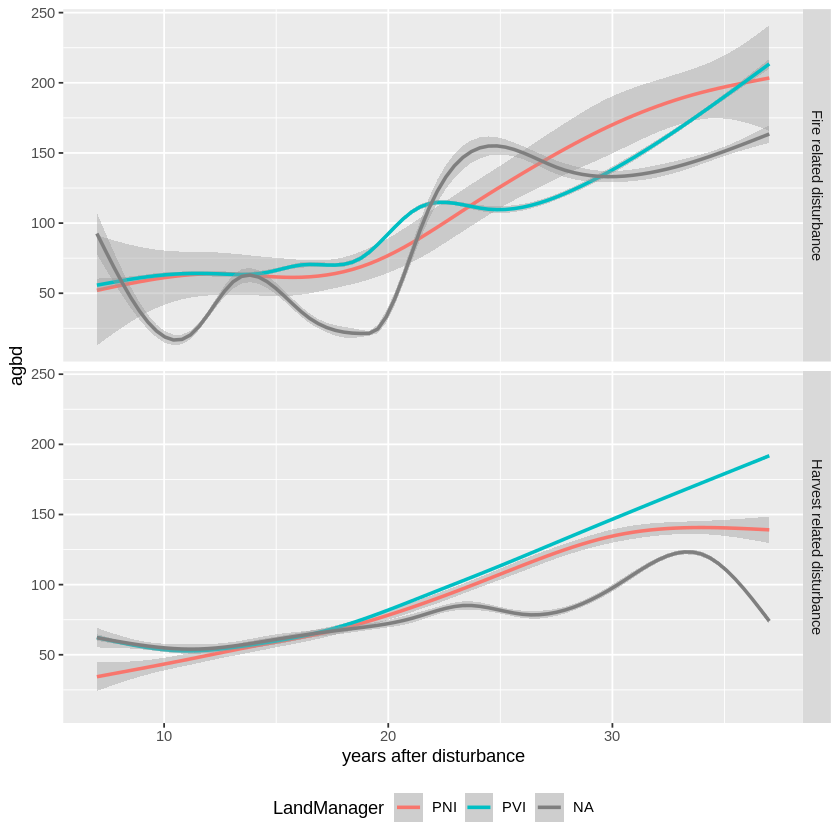

In [30]:
facet_labels <- c(
  "TRUE" = "Harvest related disturbance",
  "FALSE" = "Fire related disturbance"
)
gedi_int_dt[min_yod>1980 & gedi_year>min_yod+5 &gedi_vec_area>1000 & !is.na(agbd)  &l4_quality_flag==1,][,list(agbd = mean(agbd,na.rm=T),mean_conus_2003 = mean(mean_conus_2003,na.rm=T),mean_hja_2008 = mean(mean_hja_2008,na.rm=T),mean_conus_2016 = mean(mean_conus_2016,na.rm=T),min_yod = mean(min_yod,na.rm=T),class = is.na(FIRE_INC_ID)),by=.(FIRE_NAME,LandManager,gedi_year,gedi_vec_id)] %>%
  ggplot(aes(x=2023-min_yod,y=agbd,color=LandManager))+
  # geom_point( ) +
  # geom_point(aes(y=mean_conus_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # geom_point(aes(y=mean_hja_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  ) +
  # geom_point(aes(y=mean_conus_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  )+
  # geom_abline(color='red') +
  geom_smooth( ) +
  # geom_smooth(aes(y=mean_conus_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # geom_smooth(aes(y=mean_hja_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # geom_smooth(aes(y=mean_conus_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # Hide the annotations
  # Manually add custom legend
  xlab('years after disturbance')+
  # scale_color_manual(
  #   values = c('GEDI' = 'green', 'MODIS 2003' = 'red', 'ALS, 2008' = 'purple', 'LS, 2016' = 'salmon'),
  #   name = 'agbd source',  # Changing the name of the legend here
  #   breaks = c('GEDI','MODIS 2003','ALS, 2008','LS, 2016'),
  #   labels = c('GEDI', 'MODIS 2003', 'ALS, 2008','LS, 2016'),
  #   position = 'bottom') +
  theme(legend.position = 'bottom')+
  facet_grid(class~., labeller = as_labeller(facet_labels))


In [31]:
gedi_int_dt %>% names

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "gedi_year"          "min_yod"            "min_mag"           
[19] "min_dur"            "min_preval"         "min_rate"          
[22] "min_dsnr"           "max_yod"            "max_mag"           
[25] "max_dur"            "max_preval"         "max_rate"          
[28] "max_dsnr"           "mean_yod"           "mean_mag"          
[31] "mean_dur"           "mean_preval"        "mean_rate"         
[34] "mean_dsnr"          "median_yod"         "median_mag"        
[37] "median_dur"         "median_preval"      "median_rate"       
[40] "median_dsnr"        "min_hja_2008"       "max_hja_2008"      
[43] "mean_hja_2008"      "median_hja_2008"    "min_conus_2003"    
[46] "max_conus_2003"     "mean_conus_2003"    "median_conus_2003" 
[49] "min_conus_2016"     "max_conus_2016"     "mean_conus_2016"   
[52] "median_conus_2016"  "gedi_vec_id"        "gedi_vec_year"     
[55] "gedi_vec_area"      "Ownership"          "LandManager"       
[58] "FIRE_INC_ID"        "FIRE_NAME"          "FIRE_YEAR"         
[61] "geom"               "HUC8"               "HUC10"             
[64] "HUC12"

In [32]:
gedi_int_dt[,shot_id := 1:length(lat_lowestmode)]

In [33]:
# distrubance_dt[n>5 &n <101][,nrow := length(agbd),by=gedi_vec_id][,include:= all(c(TRUE, FALSE) %in% pre_disturbance),by=gedi_vec_id][include == TRUE][nrow>3] %>% head

In [34]:
# distrubance_dt <- gedi_int_dt[order(gedi_vec_id,gedi_year)][gedi_vec_area>0 &algorithm_run_flag==1&min_yod>0][,list( n=length(agbd),agbd = mean(agbd,na.rm=T),agbd_sd = sd(agbd,na.rm=T),mean_preval = mean(mean_preval,na.rm=T),mean_mag = mean(mean_mag,na.rm=T),mean_postval = mean(mean_preval,na.rm=T)-mean(mean_mag,na.rm=T),disturbance_min = mean(min_yod,na.rm=T),disturbance_max = mean(max_yod,na.rm=T),pre_disturbance = (gedi_year %>% as.numeric) < mean(min_yod,na.rm=T),shot_id = list(unique(shot_id))),by=.(gedi_vec_id,gedi_year)]
# distrubance_dt %>% head()

distrubance_summary_dt <-
distrubance_dt[n>5 ][,nrow := length(agbd),by=gedi_vec_id][,include:= all(c(TRUE, FALSE) %in% pre_disturbance),by=gedi_vec_id][include == TRUE][nrow>1]  %>%
split(.,.$gedi_vec_id) %>%
lapply(function(x){
data.table(
  gedi_vec_id = (x$gedi_vec_id %>% unique) %>% unlist,
  agbd_pre = mean(gedi_int_dt[x[gedi_year == min(gedi_year)]$shot_id %>% unlist,]$agbd,na.rm=T),
  agbd_post = mean(gedi_int_dt[x[gedi_year == max(gedi_year)]$shot_id %>% unlist,]$agbd,na.rm=T),
  mean_preval = mean(gedi_int_dt[x $shot_id %>% unlist,]$mean_preval,na.rm=T),
  mean_mag = mean(gedi_int_dt[x $shot_id %>% unlist,]$mean_mag,na.rm=T))
}) %>% rbindlist()
# ggplot(aes(y=angbd,x=gedi_year %>% as.numeric))+

# geom_smooth(aes(y=agbd,x=gedi_year %>% as.numeric,group=gedi_vec_id),method='lm',se=F)+
# geom_smooth(aes(),method='lm',se=T,color='red')

ERROR: ignored

In [ ]:
# 0.035*log(mean_preval) - 0.0036
distrubance_summary_dt %>%
  ggplot(aes(y=agbd_pre,x= (mean_preval) ))+
    geom_point(color='blue') +
    geom_smooth(method='lm')+
    ylab('above ground biomass density')+
    xlab('ndvi; blue: pre-disturbance; red:post-disturbance.')
    # geom_point(aes(x=mean_preval-mean_mag,y=agbd_post),color='red') +
    # geom_smooth(aes(x=mean_preval-mean_mag,y=agbd_post),color='red',method='lm')

In [ ]:
# 0.035*log(mean_preval) - 0.0036
distrubance_summary_dt %>%
  ggplot(aes(y=(agbd_pre), x= mean_preval))+
    geom_point(color='blue') +
    geom_smooth(method='lm')+
    ylab('above ground biomass density')+
    xlab('ndvi; blue: pre-disturbance; red:post-disturbance.')+
    geom_point(aes(x=mean_preval-mean_mag,y=agbd_post),color='red') +
    geom_smooth(aes(x=mean_preval-mean_mag,y=agbd_post),color='red',method='lm')


In [ ]:
year_off <- 1

agbd_preval_lm <-
summary_dt[l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off) & round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval,na.rm=T),min.mag= mean(mean.mag,na.rm=T),agbd= mean(agbd,na.rm=T)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
  lm(agbd~min.endval,.)

summary_dt$agbd_postval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval-min.mag)])
summary_dt[min.preval ==0]$agbd_postval <-NA

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval)])
summary_dt[min.preval ==0]$agbd_preval <-NA

In [ ]:
fire_history_gpkg <- st_read('/content/Fire_History_polygon.gpkg')

In [ ]:
fire_history_gpkg <- fire_history_gpkg %>% st_cast('POLYGON')

In [ ]:
fire_history_int <- summary_dt %>% st_as_sf %>% st_intersects(fire_history_gpkg %>% st_transform(st_crs(summary_dt$geom)))

In [ ]:
(fire_history_int %>% unlist)[1:5]

In [ ]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
fire_history_gpkg %>% data.table %>% head %>% names


In [ ]:
fire_summary_dt <- data.table(summary_dt, (fire_history_gpkg %>% data.table)[,c('FIRE_NUM','FIRE_CODE','FIRE_NAME','FIRE_YEAR')][fire_history_int %>% lapply(function(x){x[1]}) %>% unlist,])


In [ ]:
fire_summary_dt$FIRE_YEAR %>% table

In [ ]:
# huc_8_summary_dt

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
# # resample_dt[,agbd := rnorm(1,agbd,agbd_se),by=row_id]
# # gc()
# resamp_vec <-
# 1:nrow(resample_dt) %>%
#   lapply(function(x){
#     if(!is.na())
#     rnorm(1,resample_dt$agbd[[x]],resample_dt$agbd_sd[[x]])
#   })
resample_dt <- NULL
gc()

In [ ]:
summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
summary_dt$group <- NA
# summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



summary_dt$group <- NA
summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
cluster_dt$group_new <- 1:nrow(cluster_dt)
cluster_dt <- cluster_dt[order(group)]
# print(cluster_dt)
summary_dt$group <- cluster_dt$group_new[summary_dt$group]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

In [ ]:
install.packages('randomForest')

In [ ]:
library(randomForest)

In [ ]:
calibration_dt[,group_quantile:=as.integer(cut(mean.preval-mean.mag, breaks = quantile((mean.preval-mean.mag)[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE))  %>%as.factor()]

calibration_dt %>%
  ggplot(aes(x = mean.preval-mean.mag,y=agbd))+
  geom_point(aes(color=group_quantile))

In [ ]:
calibration_dt <- resample_dt[min.yod>1984 & !is.na(agbd) ,]
calibration_dt$id <- 1:nrow(calibration_dt)
calibration_dt[,post_val := mean(mean.preval - mean.mag),by = id]
# calibration_dt[,group_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# calibration_dt[,agbd_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# calibration_dt[,postval_quantile:=as.integer(cut(mean.preval - mean.mag, breaks = quantile(mean.preval - mean.mag, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]


# calibration_dt %>%
#   ggplot(aes(x=agbd))+
#   geom_boxplot(aes(color=postval_quantile))
# names(calibration_dt)
# rf_form <- as.formula(paste('group_quantile ~',c('post_val',(calibration_dt %>% names)[18:41]) %>% paste(.,collapse = '+')))
# resample_dt$id <- 1:nrow(resample_dt)

# resample_dt[,agbd_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# resample_dt[,postval_quantile:=as.integer(cut(mean.preval - mean.mag, breaks = quantile(mean.preval - mean.mag, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]

# resample_dt[,post_val := mean(mean.preval - mean.mag),by = id]
# rf_result <-  randomForest(rf_form,resample_dt[min.yod>1984 & !is.na(agbd)])


In [ ]:
while(TRUE){}

In [ ]:
post_gedi_dt %>%head

In [ ]:
resample_dt[,group:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)),by = .(round(median.yod/5)*5)]

# table(resample_dt$group,round(resample_dt$median.yod /1)*1)

In [ ]:
fire_summary_dt$gedi_era <-  fire_summary_dt$min.yod > min(fire_summary_dt$year %>% as.numeric)

fire_summary_dt$post_gedi <-  (fire_summary_dt$year %>% as.numeric) - fire_summary_dt$mean.yod

# fire_summary_dt$pre_gedi <-

In [ ]:
post_gedi_dt <- fire_summary_dt[l4_quality_flag ==1 & min.yod>1984 & gedi_era  ]
post_gedi_dt[agbd >0 &year %>% as.numeric == round(mean.yod+1) |year %>% as.numeric == round(mean.yod+1) | year %>% as.numeric == round(mean.yod+2)| year %>% as.numeric == round(mean.yod+3)| year %>% as.numeric == round(mean.yod+4)| year %>% as.numeric == round(mean.yod+5)]    %>%
  ggplot(aes(y=agbd,x=mean.preval-mean.mag))+
  geom_bin2d()+
  geom_smooth(method='lm')

In [ ]:
fire_summary_dt$gedi_era %>% table

In [ ]:
# 1:1000
resample_dt <- fire_summary_dt
# resample_dt <- fire_summary_dt[min.yod>1984 & !is.na(agbd) & is.na(FIRE_YEAR) & l4_quality_flag ==1 &min.endval>0]

# resample_dt %>% head


# agbd_preval_lm <-resample_dt[] %>%
#   lm(agbd~min.endval,.)

# agbd_preval_lm %>% summary

resample_dt$agbd_postval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval-min.mag)])
resample_dt$agbd_preval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval)])

# min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)-c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)-c(1,2))
resample_dt[,min.endval:=(min.preval-min.mag)]
# resample_dt$min.endval
# # resample_dt$agbd_postval
# # resample_dt[,agbd_postval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]
# # resample_dt[,agbd_preval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]
resample_dt[,group:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]

resample_dt[,group_agbd_preval:=mean(agbd[min.yod>1984 & round(mean.yod) %in% c(round(year %>% as.numeric)+c(1,2,3))],na.rm=T) ,by=group]

resample_dt[,group_agbd_postval:=mean(agbd[min.yod>1984 & round(mean.yod) < round(year %>% as.numeric) ],na.rm=T) ,by=group]


plot_dt <- resample_dt[min.yod>1984 &l4_quality_flag ==1,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd,na.rm=T),yad = mean(2023-mean.yod),group_agbd_preval=mean(group_agbd_preval,na.rm=T),group_agbd_postval=mean(group_agbd_postval,na.rm=T),n = length(mean.yod)),by = .(group,yod_round)][yad>1]


plot_dt[,agbd_yr:=(agbd/yad),by=group]

plot_dt[order(yad),agbd_yr_cumsum := cumsum(agbd/yad)-group_agbd_postval,by = group]

# summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
# summary_dt$group <- NA
# # summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



# summary_dt$group <- NA
# summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


# cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
# cluster_dt$group_new <- 1:nrow(cluster_dt)
# cluster_dt <- cluster_dt[order(group)]
# # print(cluster_dt)
# summary_dt$group <- cluster_dt$group_new[summary_dt$group]

# summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

# summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

plot_dt$yod %>% max

plot_dt %>%

ggplot(aes(x=yad,y=agbd_yr,group=group))+

geom_point()+

geom_smooth(aes(color=group))


# plot_dt %>%
# ggplot(aes(x=yad,y=agbd_yr_cumsum,group=group_quantile))+
# geom_point()+
# geom_line(aes(color=group_quantile))
# geom_smooth(data=pred_dt,aes(),color='red')

In [ ]:
gedi_vec_gpkg$area <- st_area(gedi_vec_gpkg)

summary_dt$gedi_clust <- st_intersects(summary_dt$geom,gedi_vec_gpkg) %>% lapply(function(x){x[1]}) %>% unlist
summary_dt$gedi_clust_area <- gedi_vec_gpkg$area[summary_dt$gedi_clust]

In [ ]:
summary_dt[min.yod > 1984 & agbd>0 &l4_quality_flag ==1,] %>%
  ggplot(aes(y=(agbd - agbd_preval)/(2023-max.yod),x=max.yod,group=group))+
  geom_point() +
  # geom_line(aes(color=group))+
  geom_smooth(aes(color=group))

In [ ]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
targ_dt <- huc_10_summary_dt[Name == 'Thomas Creek' & group ==1]

loess_dt <- huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3]

huc_10_summary_dt[,yad := 2023-mean.yod]
targ_dt$agbd_pred <-
predict(loess_dt[Name == 'Thomas Creek' & group == 1] %>%
  loess(agbd~yad,.), targ_dt)

In [ ]:
targ_dt[yad>3,] %>%
  ggplot(aes(x=agbd_pred-agbd))+
  geom_histogram(bins=100)

In [ ]:
targ_dt[yad>3,] %>% st_as_sf() %>% st_write('/content/example.gpkg')

In [ ]:
huc_10_dist_table <- huc_10_summary_dt$Name %>% table
huc_10_summary_dt <- huc_10_summary_dt[Name %in% c(huc_10_dist_table[huc_10_dist_table>100] %>% names),]

huc_10_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']



fit <- loess(y ~ x)
predictions <- predict(fit, newdata = data.frame(x = x))

huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)


In [ ]:
huc_12_dist_table <- huc_12_summary_dt$Name %>% table
huc_12_summary_dt <- huc_12_summary_dt[Name %in% c(huc_12_dist_table[huc_12_dist_table>100] %>% names),]

huc_12_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']





huc_12_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)